In [45]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [46]:
dataset = pd.read_csv("data/csv_result-ebay_confianca_completo.csv")

dataset.shape

(5806, 75)

In [47]:
dataset.head(15)

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom
7,72,0,N,4.834130,0.3,0,2.994083,0.5,0,4.804655,...,0.705489,0.662750,0.719276,0.619855,0.678977,0.763664,0.715188,0.672697,0.817781,Ruim
8,68,0,N,4.583227,0.5,0,3.766229,0.5,1,4.768499,...,0.763725,0.677878,0.737148,0.649325,0.666209,0.769503,0.754634,0.690733,0.818703,Bom
9,142,0,N,4.867134,0.3,0,3.122022,0.5,1,4.700549,...,0.741146,0.643844,0.690222,0.635208,0.619500,0.766466,0.694922,0.673925,0.822170,Bom
10,48,0,N,5.320103,0.5,0,2.779621,0.5,0,5.357514,...,0.753940,0.655293,0.721071,0.663534,0.649143,0.762069,0.662349,0.655148,0.826317,Bom
11,96,0,N,4.593392,0.5,0,3.241813,0.5,0,4.739491,...,0.755873,0.602638,0.708592,0.666241,0.640240,0.772720,0.707340,0.675449,0.812079,Bom


In [48]:
X = np.array(dataset.iloc[:, 0:74].values)

y = np.array(dataset.iloc[:, 74].values)

for i in range(0, 73):
    labelencoder_X = LabelEncoder()

    if X[:, i].dtype == object:
        X[:, i] = labelencoder_X.fit_transform(X[:, i])

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [49]:
np.unique(y, return_counts=True)

(array([0, 1]), array([4299, 1507]))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4064, 74), (1742, 74), (4064,), (1742,))

In [51]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy: %.2f" % (accuracy * 100))

Accuracy: 74.28


In [53]:
cm = confusion_matrix(y_test, predictions)

cm

array([[1276,   14],
       [ 434,   18]])

<Axes: >

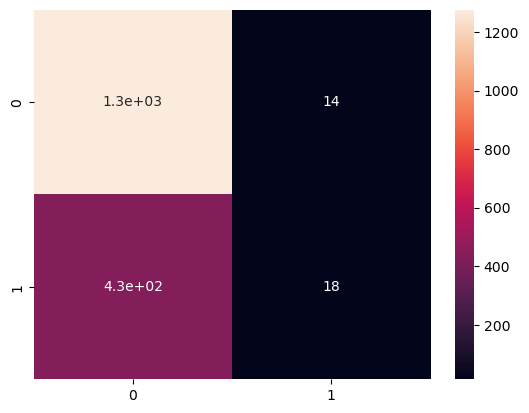

In [54]:
sns.heatmap(cm, annot=True)

In [65]:
print("Accuracy: ", (cm[0][0] + cm[1][1]) / cm.sum())
print("Precision: ", cm[1][1] / (cm[1][1] + cm[0][1]))
print("Recall: ", cm[1][1] / (cm[1][1] + cm[1][0]))

Accuracy:  0.7428243398392652
Precision:  0.5625
Recall:  0.03982300884955752


# Imbalanced classes

In [56]:
np.unique(y, return_counts=True), np.unique(y_train, return_counts=True)

((array([0, 1]), array([4299, 1507])), (array([0, 1]), array([3009, 1055])))

## Undersampling

In [57]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

X_under, y_under = tl.fit_resample(X, y)

np.unique(y_under, return_counts=True)

(array([0, 1]), array([4028, 1507]))

In [58]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(
    X_under, y_under, test_size=0.3, stratify=y_under
)

model_u = RandomForestClassifier(n_estimators=100)

model_u.fit(X_train_u, y_train_u)

RandomForestClassifier()

In [59]:
predictions_u = model_u.predict(X_test_u)

cm_u = confusion_matrix(y_test_u, predictions_u)

In [60]:
print("Accuracy: ", accuracy_score(y_test_u, predictions_u))
print("Precision", cm_u[1][1] / (cm_u[1][1] + cm_u[0][1]))
print("Recall", cm_u[1][1] / (cm_u[1][1] + cm_u[1][0]))

Accuracy:  0.7344972907886815
Precision 0.6774193548387096
Recall 0.046460176991150445


## Oversampling

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_over, y_over = smote.fit_resample(X, y)

np.unique(y_over, return_counts=True)

(array([0, 1]), array([4299, 4299]))

In [62]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(
    X_over, y_over, test_size=0.3, stratify=y_over
)

model_o = RandomForestClassifier(n_estimators=100)

model_o.fit(X_train_o, y_train_o)

RandomForestClassifier()

In [63]:
predictions_o = model_o.predict(X_test_o)

cm_o = confusion_matrix(y_test_o, predictions_o)

In [64]:
print("Accuracy: ", accuracy_score(y_test_o, predictions_o))
print("Precision", cm_o[1][1] / (cm_o[1][1] + cm_o[0][1]))
print("Recall", cm_o[1][1] / (cm_o[1][1] + cm_o[1][0]))

Accuracy:  0.8515503875968993
Precision 0.9339712918660287
Recall 0.7565891472868217
